# Data Exploration and Visualization 

In this notebook I use Neural Networks to identify underlying patterns in our book data that our stakeholders can use to impact their businesses.


By: Prince Okpoziakpo

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read the book data into the 'books_df' dataframe
books_df = pd.read_csv('../data/isbn13_results.csv').drop(columns=['Unnamed: 0'])
books_df.shape

(2761, 13)

# Data Cleaning

## Removing null values

In [3]:
# get all the books that have a description
books_df = books_df.loc[~books_df.description.isna()] 
books_df.shape

(2620, 13)

In [4]:
# get all the books that have categories
books_df = books_df.loc[~books_df.main_categories.isna()]
books_df.shape

(2581, 13)

In [5]:
category_counts = books_df.categories.value_counts()
category_counts[category_counts == 1]

['Disinheritance']                              1
['Physics']                                     1
['Experimental fiction']                        1
['Poets, American']                             1
['Los Angeles (Calif.)']                        1
                                               ..
['Canterbury (England)']                        1
['Psychic ability']                             1
['Perception (Philosophy).']                    1
['Spiritual life']                              1
['Science fiction comic books, strips, etc']    1
Name: categories, Length: 406, dtype: int64

# Feature Extraction

## Vectorize each document from the corpus

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

### Fitting the vectorizer and transforming the corpus

In [7]:
# instantiate the CountVectorizer object; `stop_words` parameter makes sure 
# we exclude English stop words
vectorizer = CountVectorizer(stop_words="english")

# extract the 'description' column and convert it into an array 
descriptions = books_df.description.to_numpy()

# fit the vectorizer and transform the corpus
bag_of_words = vectorizer.fit_transform(descriptions)

print(f"Vocabulary size: {vectorizer.vocabulary_.__len__()}")
print(f"Sample features: {vectorizer.get_feature_names_out()[1000:1005]}\n")
print(bag_of_words.toarray(), '\n')

print(bag_of_words.shape)

Vocabulary size: 23128
Sample features: ['altar' 'alter' 'alteration' 'altered' 'altering']

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

(2581, 23128)


# Target Extraction

## Exploring the categories of each book

In [8]:
# determine the number of unique categories that exist in the dataset
all_categories = [] 
for categories_list_string in books_df.main_categories: 
    if type(categories_list_string) == str:
        c = categories_list_string.\
        rstrip().\
        lstrip().\
        replace('[', '').\
        replace(']', '').\
        replace("\'", '').\
        replace("\"", '').\
        split(',')
        all_categories += c

print("Number of unique categories: ", len(set(all_categories)))

Number of unique categories:  559


## Fit and transform the targets into a label indicator matrix

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

In [10]:
# convert the type of the categories from string into an array of categories
all_categories = books_df.main_categories.apply(
    lambda s: s.\
        rstrip().\
        lstrip().\
        replace('[', '').\
        replace(']', '').\
        replace("\'", '').\
        replace("\"", '').\
        split(',')
).to_numpy()

In [11]:
# instantiate the binarizer object
mlb = MultiLabelBinarizer()

# fit and transform the labels of the targets into a label indicator matrix
targets = mlb.fit_transform(all_categories)

# verfiy that the number of rows matches the number of rows in `books_df`
# verify that the number of columns matches the number of unique categories
targets.shape

(2581, 559)

# Model Training

## Training the model

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts

In [13]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = tts(bag_of_words, targets, random_state=42, test_size=.2)

In [14]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## Evaluating model performance

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(clf, X_test, y_test, cv=5)

array([0.26923077, 0.25      , 0.21359223, 0.26213592, 0.2815534 ])

## Visualization

In [17]:
from sklearn.tree import plot_tree

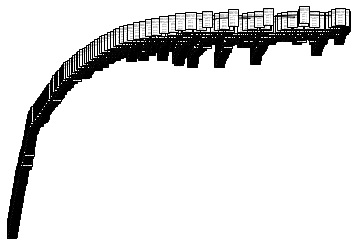

In [18]:
plot_tree(clf)

In [19]:
clf.get_depth()

150